In [1]:
import os
import glob
import json
import matplotlib.pyplot as plt
import re

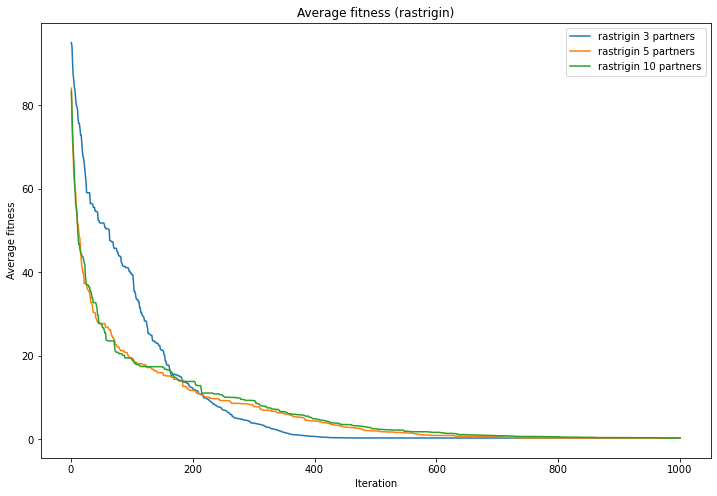

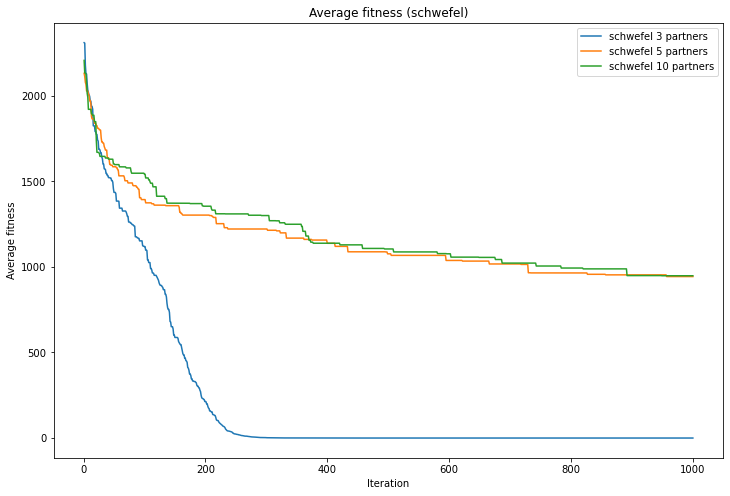

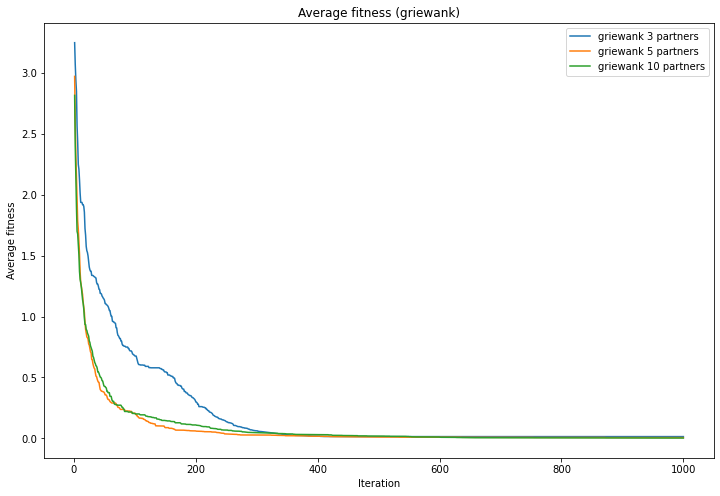

In [16]:
functions = ['rastrigin', 'schwefel', 'griewank']
parameter_regex = r'.*_(\d+)_.*'

for function in functions:
    files = glob.glob(f'./{function}*.json')
    files = sorted(files, key=lambda f: int(re.match(parameter_regex, f).group(1)))
    results = []
    for file in files:
        with open(file, 'r') as reader:
            results.append(reader.read())
    
    
    results_as_json = [json.loads(result) for result in results]
    average_fitnesses = [res['average_fitness'] for res in results_as_json]
    
    x = range(1, 1001)
    plt.figure(figsize=(12, 8))
    plt.xlabel('Iteration')
    plt.ylabel('Average fitness')

    for i, fit in enumerate(average_fitnesses):
        y = fit
        plt.title(f'Average fitness ({function})')
        plt.plot(x, y, label=files[i][2:-5].replace("_", " "))
    
    plt.legend()
    plt.savefig(f'average_fitness_{function}_chart.png')

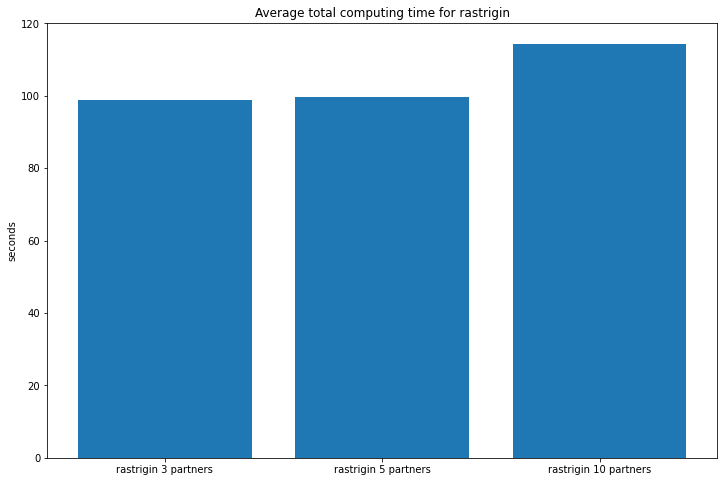

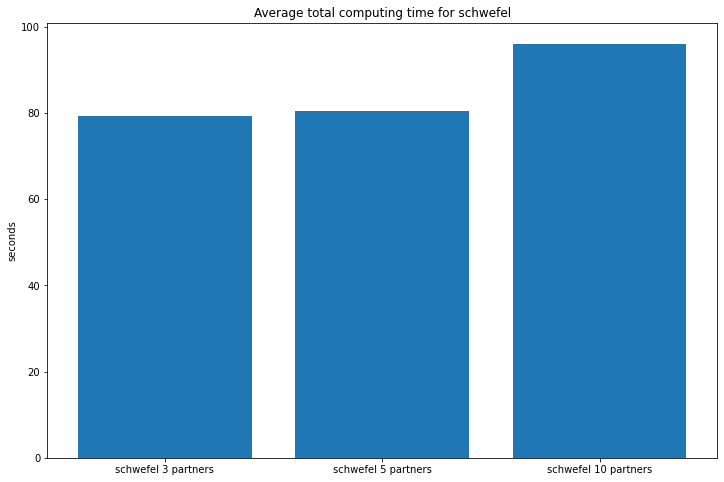

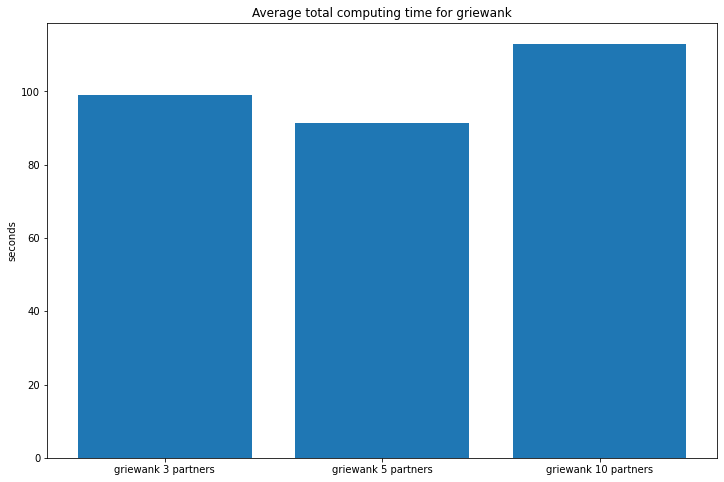

In [17]:
for function in functions:
    files = glob.glob(f'./{function}*.json')
    files = sorted(files, key=lambda f: int(re.match(parameter_regex, f).group(1)))
    results = []
    for file in files:
        with open(file, 'r') as reader:
            results.append(reader.read())
    
    
    results_as_json = [json.loads(result) for result in results]
    average_computing_time = [res['average_total_comupting_time'] for res in results_as_json]
    
    x = [file[2:-5].replace("_", " ") for file in files]
    y = average_computing_time
    plt.figure(figsize=(12,8))
    plt.title(f'Average total computing time for {function}')
    plt.ylabel('seconds')
    plt.bar(x, y)
    plt.savefig(f'computing_time_{function}_chart.png')